# Extract data from the OzFlux eddy covariance sites

And append remote sensing data from the nearest pixel, using the datasets in `AusEflux/data/5km`

Ozflux datasets are here https://dap.tern.org.au/thredds/catalog/ecosystem_process/ozflux/catalog.html



## Load modules

In [1]:
import warnings
warnings.simplefilter(action='ignore')

import sys
sys.path.append('/g/data/os22/chad_tmp/AusEFlux/src/')
from _training import extract_ozflux

## load and save the data

In [2]:
ds = extract_ozflux(version='2023_v1',
                        level='L6',
                        type='default',
                        rs_data_folder='/g/data/os22/chad_tmp/AusEFlux/data/5km/',
                        save_ec_data='/g/data/os22/chad_tmp/AusEFlux/data/ozflux_netcdf/',
                        return_coords=True,
                        verbose=True,
                        export_path='/g/data/os22/chad_tmp/AusEFlux/data/training_data/'
                        )
    

Total number of sites to collect: 39
AliceSpringsMulga
   Extracting RS data...
AlpinePeatland
 AlpinePeatland does not exist for this combination of versions, level...skipping.
Boyagin
   Extracting RS data...
CalperumChowilla
   Extracting RS data...
CapeTribulation
   Extracting RS data...
Collie
   Extracting RS data...
CowBay
   Extracting RS data...
CumberlandPlain
   Extracting RS data...
DalyPasture
   Extracting RS data...
DalyUncleared
   Extracting RS data...
DigbyPlantation
 DigbyPlantation does not exist for this combination of versions, level...skipping.
DryRiver
   Extracting RS data...
Emerald
   Extracting RS data...
Fletcherview
   Extracting RS data...
FoggDam
   Extracting RS data...
GatumPasture
 GatumPasture does not exist for this combination of versions, level...skipping.
Gingin
   Extracting RS data...
GreatWesternWoodlands
   Extracting RS data...
HowardSprings
   Extracting RS data...
Litchfield
   Extracting RS data...
LongreachMitchellGrassRangeland
   Extr

### Loop through sites and extract lat/lon locations for a plot

In [3]:
import os
import pandas as pd
import geopandas as gpd

In [5]:
base = '/g/data/os22/chad_tmp/AusEFlux/data/training_data/'
sites = os.listdir(base)

td = []
for site in sites:
    if '.csv' in site:
        xx = pd.read_csv(base+site)
        
        xx['site'] = site[0:-4]
        xx = xx[['site', 'x_coord', 'y_coord']]
        xx=xx.head(1)
        td.append(xx)

df = pd.concat(td).dropna()
print('n_sites:', len(df))
df.head(5)

n_sites: 34


,site,x_coord,y_coord
0,DalyUncleared,131.388100,-14.159200
0,Ridgefield,116.966827,-32.506102
0,Boyagin,116.938559,-32.477093
0,CowBay,145.427150,-16.238189
0,RobsonCreek,145.630137,-17.117469


## Export site locations

In [6]:
df.to_csv('/g/data/os22/chad_tmp/AusEFlux/data/'+'ozflux_site_locations.csv')

## Plot


In [7]:
import contextily as ctx #for basemaps

In [8]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.x_coord, df.y_coord), crs="EPSG:4326"
)

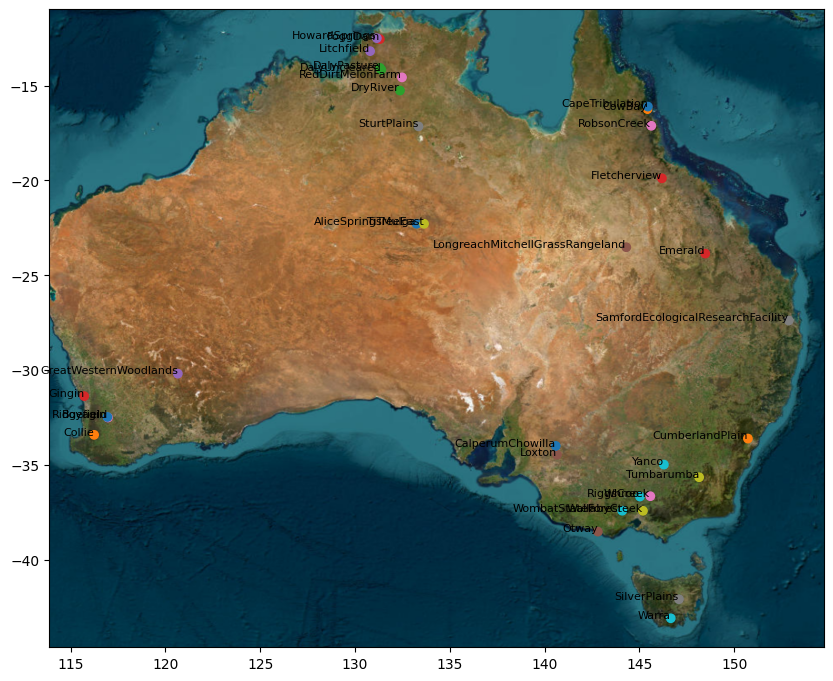

In [16]:
ax = gdf.plot(column='site', figsize=(10,10))
gdf.apply(lambda x: ax.annotate(text=x['site'], xy=x.geometry.centroid.coords[0], ha='right', fontsize=8), axis=1);

# Adding basemap might fail with max retries...something is wrong with contextily backend
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, crs='EPSG:4326', attribution='', attribution_size=1) 